<a href="https://colab.research.google.com/github/jmbanda/BigDataProgramming_2019/blob/master/InClassAssignment10_27_2019_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Finding outliers in Data**

In [0]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

**Exercise 1. Load data and show (and save) the feature names** Note: Remove .data contains the data and target contains the variable to predict/classify

In [0]:
#Load the data
boston = load_boston()

#Find features and target
x = boston.data
y = boston.target

#Find the dic keys
columns = boston.feature_names

**Exercise 2. Show the dataset desciption (DESCR)**

In [0]:
#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Exercise 3. Create Dataframe with the Boston data and show the first 5 rows**

In [0]:
#create the dataframe
boston_df = pd.DataFrame(boston.data)
#With the price
bos = pd.DataFrame(boston.data)
bos['PRICE'] = boston.target

boston_df.columns = columns
boston_df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Discover outliers with visualization tools

**Exercise 4. Plot each feature using a boxplot (you will have a total of 13 plots)**

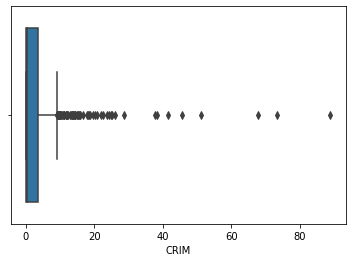

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=boston_df['CRIM'])

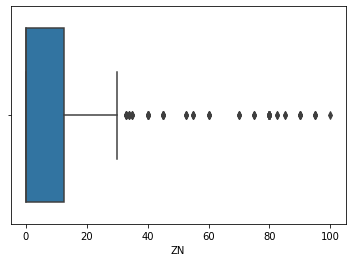

In [0]:
sns.boxplot(x=boston_df['ZN'])

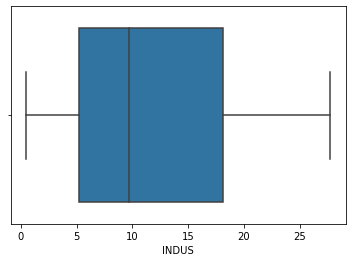

In [0]:
sns.boxplot(x=boston_df['INDUS'])

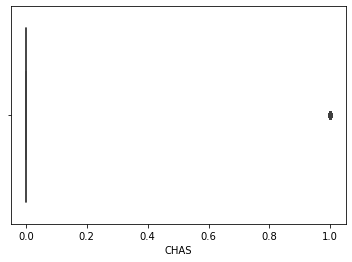

In [0]:
sns.boxplot(x=boston_df['CHAS'])

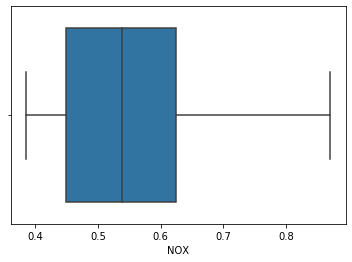

In [0]:
sns.boxplot(x=boston_df['NOX'])

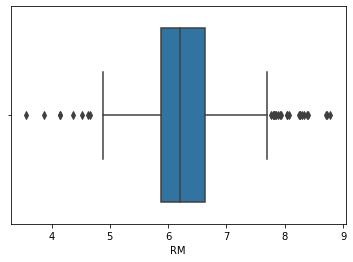

In [0]:
sns.boxplot(x=boston_df['RM'])

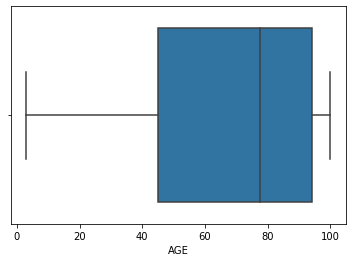

In [0]:
sns.boxplot(x=boston_df['AGE'])

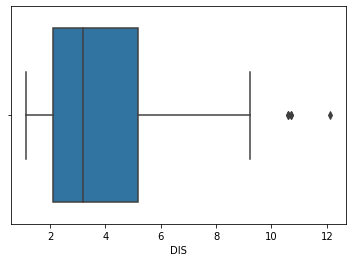

In [0]:
sns.boxplot(x=boston_df['DIS'])

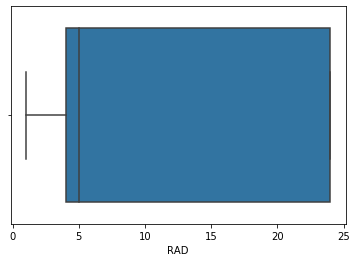

In [0]:
sns.boxplot(x=boston_df['RAD'])

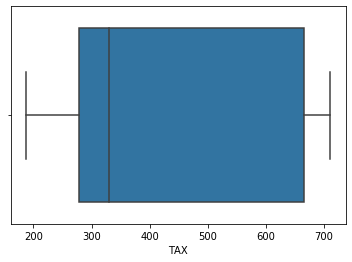

In [0]:
sns.boxplot(x=boston_df['TAX'])

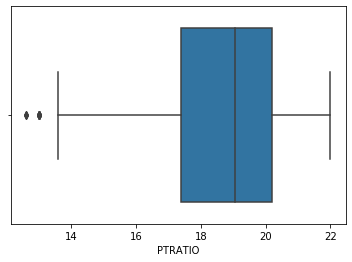

In [0]:
sns.boxplot(x=boston_df['PTRATIO'])

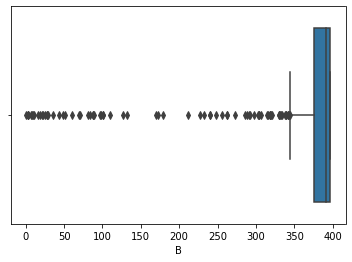

In [0]:
sns.boxplot(x=boston_df['B'])

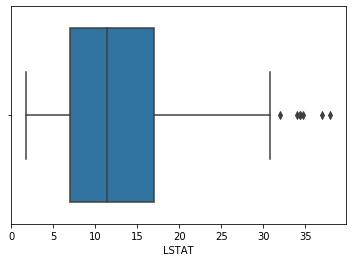

In [0]:
sns.boxplot(x=boston_df['LSTAT'])

Notice anything odd in these plots?? those points outside are outliers and they can cause weird behavior on your models. 

Here we analysed Uni-variate outlier i.e. we used each column only to check the outlier. But we can do multivariate outlier analysis too. 

Can we do the multivariate analysis with Box plot? Well it depends, if you have a categorical values then you can use that with any continuous variable and do multivariate outlier analysis. 

As we do not have categorical value in our Boston Housing dataset, we might need to forget about using box plot for multivariate outlier analysis.

**Exercise 5. Use a scatter plot to analyize your data points (for features INDUS and TAX). By definition the scatter plot is the collection of points that shows values for two variables. We can try and draw scatter plot for two variables from our housing dataset.**

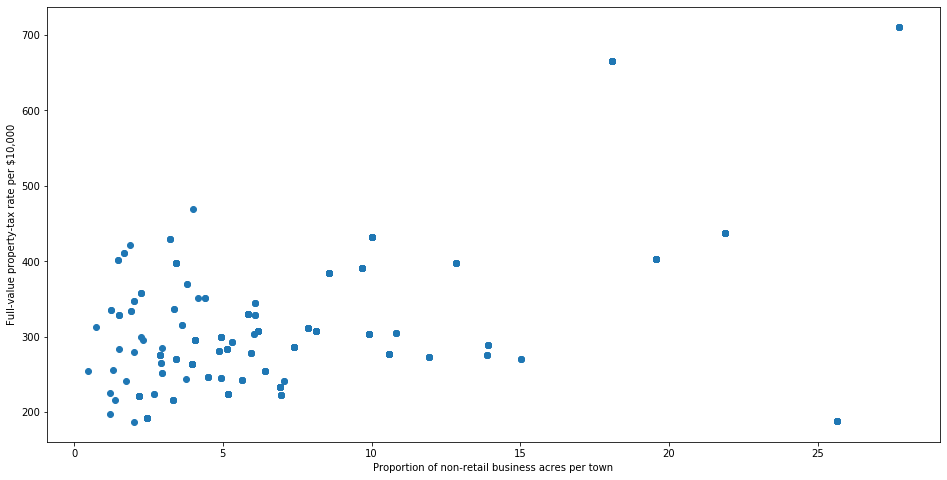

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

**Exercise 6. Describe what you see on the previous plot. Can you see some outliers here too?**

**Exercise 7. Use the Z-score to remove outliers.**

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. 

These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

Now use Z-score function defined in scipy library to detect the outliers.

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


Looking the code and the output above, it is difficult to say which data point is an outlier. 

Define a threshold to identify an outlier:

In [0]:
threshold = 3
print(np.where(z > threshold))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

Lastly, write code to show the z-score of 55,1 to show that this is true. 

In [0]:
print(z[55][1])

3.375038763517309


## Working with Outliers: Correcting, Removing

During data analysis when you detect the outlier one of most difficult decision could be how one should deal with the outlier. Should they remove them or correct them? 

**Exercise 8. Write code to remove all rows where we have an outlier with a z-score of more than 3.**

In [0]:
boston_df_o = boston_df[(z < threshold).all(axis=1)]
bos_removed= bos[(z < threshold).all(axis=1)]  #let's remove them from the 

Show the shape of your old and new dataframe, how many rows did we ended up dropping?

In [0]:
boston_df.shape

(506, 13)

In [0]:
boston_df_o.shape

(415, 13)

**Exercise 9. Setting a common random seed (0) and 50 estimators, build the following models:**

Note: If you havent, remove the PRICE feature as this is our target (PRICE - Median value of owner-occupied homes in $1000's)

**1) Build and train a Linear Regression and RandomForestRegressor model (using 80% training, 20% testing data) on the original Boston data (no outliers removed)**

**2) Build and train a Linear Regression and RandomForestRegressor model (using 80% training, 20% testing data) on the Boston data with outliers removed.**

**3) Build and train a Linear Regression and RandomForestRegressor model using a *pipeline* with a Normalizer** on the original Boston data

**4) Build and train a Linear Regression and RandomForestRegressor model using a *pipeline* with a Normalizer** on the Boston data with outliers removed.

Evaluate each one with the following metrics: Mean Absolute Error, Mean Squared Error and Root Mean Squared Error AND model score.

**Create a table that shows all metrics for all models at the end.**

Mean Absolute Error: 3.8429092204444997
Mean Squared Error: 33.44897999767638
Root Mean Squared Error: 5.783509315085122
Model Score: 0.5892223849182526


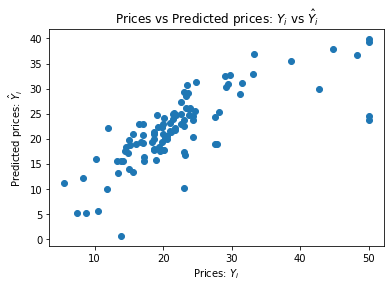

In [0]:
#1a) Linear Regression Model on original Data

eX = bos.drop('PRICE', axis = 1)
eY = bos['PRICE']

from sklearn.model_selection import train_test_split
eX_train, eX_test, ey_train, ey_test = train_test_split(eX, eY, test_size = 0.20, random_state = 0)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(eX_train, ey_train)

ey_pred = lm.predict(eX_test)

plt.scatter(ey_test, ey_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ey_test, ey_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ey_test, ey_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)))
print('Model Score:', lm.score(eX_test, ey_test))

results_1a= {'Experiment': 'LR_original_data_1a', 'MAE': metrics.mean_absolute_error(ey_test, ey_pred), 'MSE':metrics.mean_squared_error(ey_test, ey_pred)  , 'RMSE':np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)), 'MS':lm.score(eX_test, ey_test)}

Mean Absolute Error: 2.658725490196079
Mean Squared Error: 18.40358349019608
Root Mean Squared Error: 4.289939800299776
Model Score: 0.7739907125542924


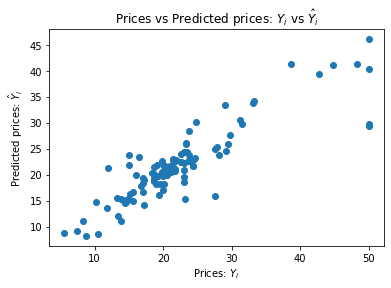

In [0]:
#1b) RandomForestRegressor on Original Data Model

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

#Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

regressor.fit(X_train, y_train)

#Predicting the Test set results
y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Model Score:', regressor.score(X_test, y_test))

results_1b= {'Experiment': 'RFR_original_data_1b', 'MAE': metrics.mean_absolute_error(y_test, y_pred), 'MSE':metrics.mean_squared_error(y_test, y_pred)  , 'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 'MS':regressor.score(X_test, y_test)}


Mean Absolute Error: 2.4742124736939535
Mean Squared Error: 10.698651498862995
Root Mean Squared Error: 3.2708793158511664
Model Score: 0.755219925936524


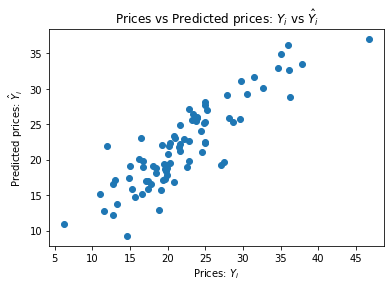

In [0]:
#2a) Linear Regression Model on data without outliers data

eX = bos_removed.drop('PRICE', axis = 1)
eY = bos_removed['PRICE']

eX_train, eX_test, ey_train, ey_test = train_test_split(eX, eY, test_size = 0.20, random_state = 0)

from sklearn.linear_model import LinearRegression

lm_o = LinearRegression()
lm_o.fit(eX_train, ey_train)

ey_pred = lm_o.predict(eX_test)

plt.scatter(ey_test, ey_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ey_test, ey_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ey_test, ey_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)))
print('Model Score:', lm.score(eX_test, ey_test))

results_2a= {'Experiment': 'LR_no_outlier_2a', 'MAE': metrics.mean_absolute_error(ey_test, ey_pred), 'MSE':metrics.mean_squared_error(ey_test, ey_pred)  , 'RMSE':np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)), 'MS':lm.score(eX_test, ey_test)}

Mean Absolute Error: 2.1493493975903615
Mean Squared Error: 9.673485301204822
Root Mean Squared Error: 3.1102227092613193
Model Score: 0.8928929412075667


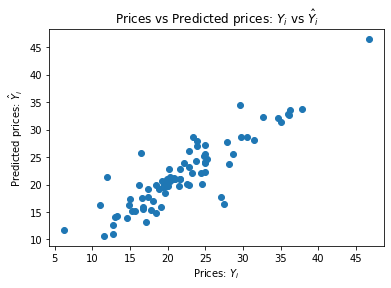

In [0]:
#2b) RandomForestRegressor on outlier removed data

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

eX = bos_removed.drop('PRICE', axis = 1)
eY = bos_removed['PRICE']

X_train, X_test, y_train, y_test = train_test_split(eX, eY, test_size = 0.20, random_state = 0)

#Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor_o = RandomForestRegressor(n_estimators = 50, random_state = 0)

regressor_o.fit(X_train, y_train)

#Predicting the Test set results
y_pred = regressor_o.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Model Score:', regressor.score(X_test, y_test))

results_2b= {'Experiment': 'RFR_no_outlier_2b', 'MAE': metrics.mean_absolute_error(y_test, y_pred), 'MSE':metrics.mean_squared_error(y_test, y_pred)  , 'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 'MS':regressor.score(eX_test, ey_test)}


Mean Absolute Error: 3.644441758635482
Mean Squared Error: 34.36235895501711
Root Mean Squared Error: 5.861941568713997
Model Score: 0.5780054321206384


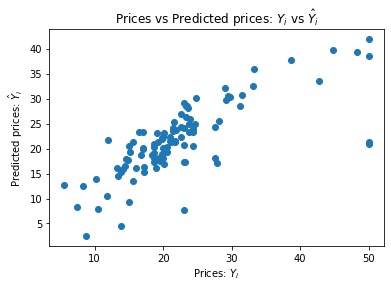

In [0]:
#3a Pipeline with Linear Regression and original data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

eX = bos.drop('PRICE', axis = 1)
eY = bos['PRICE']

eX_train, eX_test, ey_train, ey_test = train_test_split(eX, eY, test_size = 0.20, random_state = 0)

from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('scaler',Normalizer()),
    ('clf', LinearRegression())
])


pipeline.fit(eX_train,ey_train)

ey_pred = pipeline.predict(eX_test)

plt.scatter(ey_test, ey_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ey_test, ey_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ey_test, ey_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)))
print('Model Score:', pipeline.score(eX_test, ey_test))


results_3a= {'Experiment': 'LR_pipeline_original_data_3a', 'MAE': metrics.mean_absolute_error(ey_test, ey_pred), 'MSE':metrics.mean_squared_error(ey_test, ey_pred)  , 'RMSE':np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)), 'MS':pipeline.score(eX_test, ey_test)}


Mean Absolute Error: 2.9865882352941195
Mean Squared Error: 24.729676156862748
Root Mean Squared Error: 4.972894142937566
Model Score: 0.6963017289565867


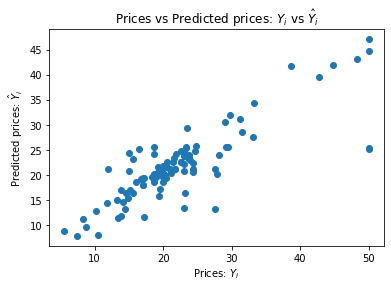

In [0]:
#3b Pipeline with Random ForestRegressor and original data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

eX = bos.drop('PRICE', axis = 1)
eY = bos['PRICE']

eX_train, eX_test, ey_train, ey_test = train_test_split(eX, eY, test_size = 0.20, random_state = 0)

#Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaler',Normalizer()),
    ('rfr', RandomForestRegressor(n_estimators = 50, random_state = 0))
])


pipeline.fit(eX_train,ey_train)

ey_pred = pipeline.predict(eX_test)

plt.scatter(ey_test, ey_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ey_test, ey_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ey_test, ey_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)))
print('Model Score:', pipeline.score(eX_test, ey_test))

results_3b= {'Experiment': 'RFR_pipeline_original_data_3b', 'MAE': metrics.mean_absolute_error(ey_test, ey_pred), 'MSE':metrics.mean_squared_error(ey_test, ey_pred)  , 'RMSE':np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)), 'MS':pipeline.score(eX_test, ey_test)}

Mean Absolute Error: 2.3914952044842033
Mean Squared Error: 9.74146524283454
Root Mean Squared Error: 3.121132045081486
Model Score: 0.7956445574711908


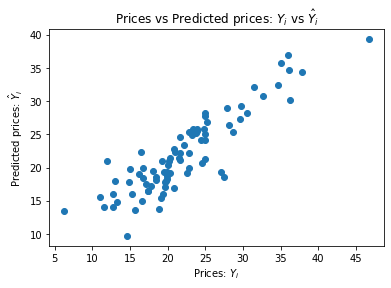

In [0]:
#4a Pipeline with Linear Regression and original data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

eX = bos_removed.drop('PRICE', axis = 1)
eY = bos_removed['PRICE']

eX_train, eX_test, ey_train, ey_test = train_test_split(eX, eY, test_size = 0.20, random_state = 0)

from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('scaler',Normalizer()),
    ('clf', LinearRegression())
])


pipeline.fit(eX_train,ey_train)

ey_pred = pipeline.predict(eX_test)

plt.scatter(ey_test, ey_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ey_test, ey_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ey_test, ey_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)))
print('Model Score:', pipeline.score(eX_test, ey_test))

results_4a= {'Experiment': 'LR_pipeline_outlier_removed_4a', 'MAE': metrics.mean_absolute_error(ey_test, ey_pred), 'MSE':metrics.mean_squared_error(ey_test, ey_pred)  , 'RMSE':np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)), 'MS':pipeline.score(eX_test, ey_test)}

Mean Absolute Error: 2.6792530120481928
Mean Squared Error: 14.306002650602407
Root Mean Squared Error: 3.782327676260005
Model Score: 0.6998901674845479


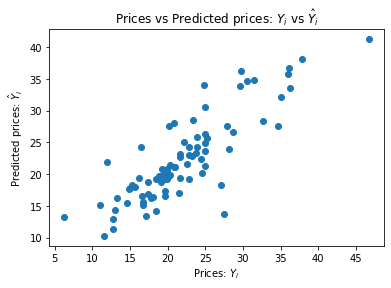

In [0]:
#4b Pipeline with Random ForestRegressor and original data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

eX = bos_removed.drop('PRICE', axis = 1)
eY = bos_removed['PRICE']

eX_train, eX_test, ey_train, ey_test = train_test_split(eX, eY, test_size = 0.20, random_state = 0)

#Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaler',Normalizer()),
    ('rfr', RandomForestRegressor(n_estimators = 50, random_state = 0))
])


pipeline.fit(eX_train,ey_train)

ey_pred = pipeline.predict(eX_test)

plt.scatter(ey_test, ey_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ey_test, ey_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ey_test, ey_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)))
print('Model Score:', pipeline.score(eX_test, ey_test))

results_4b= {'Experiment': 'RFR_pipeline_outlier_removed_data_4b', 'MAE': metrics.mean_absolute_error(ey_test, ey_pred), 'MSE':metrics.mean_squared_error(ey_test, ey_pred)  , 'RMSE':np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)), 'MS':pipeline.score(eX_test, ey_test)}

In [0]:
data = [results_1a,results_1b,results_2a,results_2b,results_3a,results_3b,results_4a,results_4b] 
Results_df = pd.DataFrame(data) 
Results_df

,Experiment,MAE,MSE,RMSE,MS
0,LR_original_data_1a,3.842909,33.448980,5.783509,0.589222
1,RFR_original_data_1b,2.658725,18.403583,4.289940,0.773991
2,LR_no_outlier_2a,2.474212,10.698651,3.270879,0.755220
3,RFR_no_outlier_2b,2.149349,9.673485,3.110223,0.892893
4,LR_pipeline_original_data_3a,3.644442,34.362359,5.861942,0.578005
5,RFR_pipeline_original_data_3b,2.986588,24.729676,4.972894,0.696302
6,LR_pipeline_outlier_removed_4a,2.391495,9.741465,3.121132,0.795645
7,RFR_pipeline_outlier_removed_data_4b,2.679253,14.306003,3.782328,0.699890


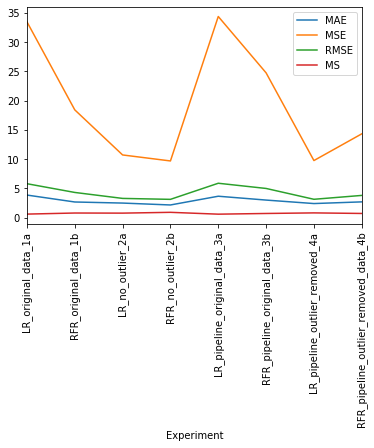

In [0]:
ax = plt.gca()

Results_df.plot(kind='line',x='Experiment',y='MAE',ax=ax)
Results_df.plot(kind='line',x='Experiment',y='MSE',ax=ax)
Results_df.plot(kind='line',x='Experiment',y='RMSE',ax=ax)
Results_df.plot(kind='line',x='Experiment',y='MS',ax=ax)
plt.xticks(rotation=90)
plt.show()

**Extra Credit (20 points). Setting a common random seed (0) and 50 estimators, build the following models: Buil a pipeline for Polinomial linear regression (degree 2) on both the original and the outlier removed data. What do you observe when changing the degree to 3?**

Mean Absolute Error: 2.672789524836712
Mean Squared Error: 13.028599586989868
Root Mean Squared Error: 3.609515145693375
Model Score: 0.7266873958115916


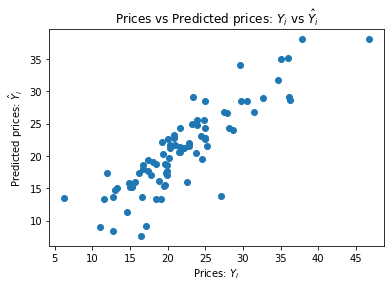

In [0]:
# Extra Credit - Excercise 10

#4b Pipeline with Polynomial Regression and outlier removed data
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

eX = bos_removed.drop('PRICE', axis = 1)
eY = bos_removed['PRICE']


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

eX_train, eX_test, ey_train, ey_test = train_test_split(eX, eY, test_size = 0.20, random_state = 0)

pipeline = Pipeline([
    ('polynomial',PolynomialFeatures(degree=2)),
    ('LR', LinearRegression())
])

pipeline.fit(eX_train, ey_train)

ey_pred = pipeline.predict(eX_test)

plt.scatter(ey_test, ey_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ey_test, ey_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ey_test, ey_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)))
print('Model Score:', pipeline.score(eX_test, ey_test))


Mean Absolute Error: 3.342738643814536
Mean Squared Error: 25.215797416856976
Root Mean Squared Error: 5.0215333730701195
Model Score: 0.6903318090416943


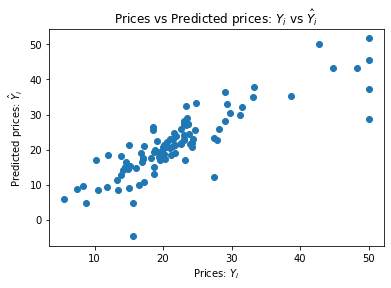

In [0]:
# Extra Credit - Excercise 10

#4b Pipeline with Polynomial Regression and original data
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

eX = bos.drop('PRICE', axis = 1)
eY = bos['PRICE']


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

eX_train, eX_test, ey_train, ey_test = train_test_split(eX, eY, test_size = 0.20, random_state = 0)

pipeline = Pipeline([
    ('polynomial',PolynomialFeatures(degree=2)),
    ('LR', LinearRegression())
])

pipeline.fit(eX_train, ey_train)

ey_pred = pipeline.predict(eX_test)

plt.scatter(ey_test, ey_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ey_test, ey_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ey_test, ey_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ey_test, ey_pred)))
print('Model Score:', pipeline.score(eX_test, ey_test))

Sources:

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html